# Python Programming for Scientists - Day 3

In the third day we will learn the three most important libraries for data analysis in python:

* [numpy](https://numpy.org/doc/stable/user/index.html) (for efficient numeric arrays)
* [matplotlib](https://matplotlib.org/stable/plot_types/index.html) (for plotting)
* [scipy](https://scipy.github.io/devdocs/tutorial/general.html) (for many mathematical and numerical algorithms)

Day 4: classes, OO, decorators, errors, pandas, tensorflow/pytorch?

Day 5: making it go fast! multithreading, multiprocessing, numba, pybind11

# [1] Numpy

So far our only way to store and manipulate sets of numbers is with lists.

In [1]:
x = [1,3,5,6,2]
y = [0,2,9,1,1]

If we want to sum these two lists, element-wise, to produce a new array $z = x + y$, in Python we would need to:

In [3]:
z = []
for i in range(len(x)):
    z.append(x[i]+y[i])
    
print(z)

[1, 5, 14, 7, 3]


### Exercise

Compute $z=x+y$ without a loop (using list comprehension instead).

In [6]:
# your solution here


This works, but in general lists in Python are:

* flexible - e.g. easy to make smaller or larger in size
* heterogeneous - may contain mixes of different types

However, flexibility comes at the cost of performance (slow) and storage (lots of memory), and lists are not good for numerical calculations.

This is where **mumpy** comes in: this is a Python library that defines a powerful **n-dimensional array** object ([ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html)) which is: high performance (fast) and lean (no excess memory).

> Note: numpy arrays can contain only numbers of exactly the same type, no mixing and matching!
>
> Note: no strings! Stick to plain Python.

To start using numpy, we import the module. In all code you will ever see, it is renamed upon import to the shorthand "np", just for convenience.

In [7]:
import numpy as np

## Creating numpy arrays

One way to create an ndarray is from a Python list, using the `array` function to convert an input list:

In [13]:
a = np.array([11, 22, 33, 44, 55])

In [11]:
print(a)

[11 22 33 44]


Numpy arrays have several attributes that give useful information about the array:

In [4]:
a.ndim  # number of dimensions

1

In [12]:
a.size # total number of elements

4

In [5]:
a.shape  # shape of the array

(4,)

In [14]:
a.dtype  # numerical type

dtype('int64')

## Data types

When you create a numpy array, you should always decide (and explicitly specify) its type!

In [16]:
a = np.array([11, 22, 33, 44, 55], dtype='int32')
a.dtype

dtype('int32')

The most common and useful data types are:

* **int16** - integer numbers, from -32768 to 32767.
* **int32** - integer numbers, from -2147483648 to 2147483647 (~two billion).
* **int64** - integer numbers, from -9223372036854775808 to 9223372036854775807 (very big).
* **float32** - "single precision" float number, with ~7 digits of precision (exponent can be anything up to ~100).
* **float64** - "double precision" float number, with ~15 digits of precision (exponent can be anything up to ~1000).

Only numbers within the minimum and maximum ranges can be stored by each type! Otherwise [overflow](https://en.wikipedia.org/wiki/Arithmetic_overflow) occurs, leading to big problems.

> For example: An array of int64 takes 64 bits (8 bytes) per entry, so the total amount of memory (and space on disk) is -twice as much- as if you had used int32 (4 bytes per entry) instead.

Also available: `int8` (integers up to 128), `complex64` (two single precision floats).

> There are also "unsigned" versions of all integers, which allow only positive numbers and so double the maximum storable value, `uint16`, `uint32`, and `uint64`.
>
> Only use if you have a good reason to! Negative numbers can be silently converted to unexpected positive numbers, leading to hard to fix bugs.

## Creating numpy arrays (cont)

There are several other ways, and helper functions, to create numpy arrays.

The `arange()` function works just like the built-in Python `range()` function, but it can also produce floating point ranges:

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(3, 12, 2)

array([ 3,  5,  7,  9, 11])

In [9]:
np.arange(1.2, 4.4, 0.1)

array([1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3])

The `linspace()` function creates linearly (evenly) spaced values between a minimum and maximum, with a given total number:

In [17]:
np.linspace(1.0, 2.0, 6)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. ])

The `logspace()` function is similar, but creates logarithmically spaced values:

In [23]:
np.logspace(1.0, 3.0, 11)

array([  10.        ,   15.84893192,   25.11886432,   39.81071706,
         63.09573445,  100.        ,  158.48931925,  251.18864315,
        398.10717055,  630.95734448, 1000.        ])

The most general and best way to create an empty numpy array is with `zeros()`, which initializes all elements of the array to zero upon creation.

In [25]:
x = np.zeros(10, dtype='float32')
y = np.zeros(1000, dtype='int64')

> You can also use `empty()`, which does not set the elements to zero (they can random random values, from whatever was left over in memory before!). A bit faster. Not worth the possible bugs, always use `zeros()` instead.
>
> You can also use `ones()`, to initialize all elements to one at creation. This is the same as `zeros()+1`.

Every time you create a numpy array, there are **two critical choices: dtype and size**. You should assume that these **can never change** for a given array after it has been made.

### Exercise

Create a numpy array which contains the value 2 repeated 10 times.

In [ ]:
# your solution here


## Indexing and Slicing

> "An array can be indexed by a tuple of nonnegative integers, by booleans, by another array, or by integers."

Similarly to lists, individual items in arrays can be accessed with an integer **index**:

In [26]:
x = np.array([9,8,7,6,5,1,1,1,2])

In [27]:
x[1]

8

Arrays can be **sliced** by specifiying the start and end of the slice (where the last element is exclusive):

In [29]:
x[0:5]

array([9, 8, 7, 6, 5])

When slicing, we can optionally specify a step size (or "stride"):

In [31]:
x[0:6:2]

array([9, 7, 5])

As for lists, the `start`, `end`, and `step` are all optional, and default to ``0``, ``len(array)``, and ``1`` respectively:

In [32]:
x[:5]

array([9, 8, 7, 6, 5])

In [33]:
x[::2]

array([9, 7, 5, 1, 2])

Note: the common trick to reverse the order of an array:

In [41]:
x[::-1]

array([2, 1, 1, 1, 5, 6, 7, 8, 9])

Instead of a single index, or a slice syntax, if you have a list (or tuple, or array) of integer **indices**, you can retrieve the corresponding elements:

In [34]:
inds = [0,1,6,7]
x[inds]

array([9, 8, 1, 1])

## Array subsets based on a condition (i.e. searching)

One of the powerful features of numpy is that you can select elements from an array that fulfill a (logical) condition.

There are two common ways to do this.

1. First, you can use a boolean "mask": an array of bools, either True or False, with the same size as the original array.

In [36]:
mask = (x > 1)
mask

array([ True,  True,  True,  True,  True, False, False, False,  True])

In [37]:
x[mask]

array([9, 8, 7, 6, 5, 2])

You don't need to save this intermediate step, you can use it directly and more succintly:

In [38]:
x[x>1]

array([9, 8, 7, 6, 5, 2])

2. Second, you can obtain and use an explicit list of indices. The **`np.where()`** function is essential, you will use it a lot!

In [39]:
w = np.where(x > 1)
print(w)

(array([0, 1, 2, 3, 4, 8]),)


In [40]:
x[w]

array([9, 8, 7, 6, 5, 2])

In these cases, you can combine multiple conditions with the **logical operators** `&` (and), `|` (or):

In [48]:
w = np.where((x>1) & (x<4))
print(w)

(array([8]),)


In [51]:
x[(x>6) | (x<2)]

array([9, 8, 7, 1, 1, 1])

### Exercise

Create a numpy array from the list `[3,-np.pi,5,89,22,938,15,-43]`. Print the indices of all elements which are either negative, or even.

In [58]:
# your solution here


## Special constants

There are a few important constants and special "values":

* `np.pi` - this is the usual $\pi \simeq 3.14$
* `np.e` - this is the usual $e \simeq 2.718$
* `np.inf` - this is an official "value" in the standard for floating point numbers, which represents $+\infty$.
* `-np.inf` - represents $-\infty$.
* `np.nan` - this is also an official "value" for floating point numbers, it represents "Not A Number" (NaN), and should be used to mark e.g. missing data.

## Multi-dimensional arrays

We can make 2D, 3D, and N-D arrays as well. The first argument `np.zeros()` is the desired shape, i.e. number of elements per dimension.

In [59]:
x2d = np.zeros((3,3), dtype='int32')

print(x2d)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [64]:
x3d = np.zeros((2,4,3), dtype='int32')

print(x3d.size, x3d.shape)

24 (2, 4, 3)


Indexing and slicing multi-dimensional arrays works as in the 1D case. Here we assign new values, instead of extracting existing values:

In [72]:
x2d[0,0] = 42     # first index applies to first dimension, second index to second dimension
x3d[0,3,1] = 11   # likewise for three dimensions
x3d[1,1,2] = 22

In [70]:
gt_zero = (x2d>0) # boolean mask array has the same dimensionality and shape as x2d
gt_zero.shape

(3, 3)

If you noticed above, the return of `np.where()` was actually always a tuple with just one element, with the indices inside this first element. This is because we were searching a one-dimensional array. In general, the return is a tuple (i.e. list) with one entry per dimension.

In [82]:
w = np.where(x3d > 1) # two elements satisfy this condition, which are returned in a 3-tuple, one entry per dimension

type(w), len(w)

(tuple, 3)

In [80]:
w

(array([0, 1]), array([3, 1]), array([1, 2]))

This can look a bit confusing, but this is exactly a format which can be used to index a multi-dimensional array:

In [81]:
x3d[w]

array([11, 22], dtype=int32)

How could we loop over a multi-dimensional array?

In [85]:
for i in range(x2d.shape[0]):
    for j in range(x2d.shape[1]):
        value = x2d[i,j]
        print(f'{i = }, {j = }, {value = }')

i = 0, j = 0, value = 42
i = 0, j = 1, value = 0
i = 0, j = 2, value = 0
i = 1, j = 0, value = 0
i = 1, j = 1, value = 0
i = 1, j = 2, value = 0
i = 2, j = 0, value = 0
i = 2, j = 1, value = 0
i = 2, j = 2, value = 0


### Exercise

Create a 2x2 numpy array with four unique entries (e.g. the numbers `1, 2, 3, 4`). Then write a function `transpose()` which takes such an array as input, and returns its transpose.

In [95]:
# your solution here


You can also slice multi-dimensional arrays:

In [145]:
x2d[0,:] # all elements along the second dimension

array([42,  0,  0], dtype=int32)

In [146]:
x2d[0:2,0:2]

array([[42,  0],
       [ 0,  0]], dtype=int32)

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [148]:
x2d[0]

array([42,  0,  0], dtype=int32)

The expression within brackets `"0"` is treated as a `0` followed by as many instances of `:` as needed to represent the remaining axes. NumPy also allows you to write this using **multi-dimensional dot notation**: `x[i, ...]`.

The dots (`...`) represent as many colons as needed to produce a complete indexing tuple.

> For example, if `x` is an array with 5 axes, then
> * `x[1, 2, ...]` is equivalent to `x[1, 2, :, :, :]`,
> * `x[..., 3]` to `x[:, :, :, :, 3]` and
> * `x[4, ..., 5, :]` to `x[4, :, :, 5, :]`.

In [152]:
x3d[1,...]

array([[ 0,  0,  0],
       [ 0,  0, 22],
       [ 0,  0,  0],
       [ 0,  0,  0]], dtype=int32)

## "Row major" vs "column major" (i,j vs j,i)

As soon as an array is multidimensional, it becomes important to understand how it is actually represented on the computer.

This is sometimes phrased as the question: "is indexing row-major, or column-major", in the sense of: does $x[i,j]$ take the element of $x$ corresponding to row $i$ and column $j$, or row $j$ and column $i$?

* If $x$ represents a 2D "matrix" (or 3D "tensor"), then it can be useful to associate the indexing $x[i,j]$ with a mathematical notation like $x_{i,j}$ for matrices.

* If $x$ represents a 2D "image", it can also be useful to associate the indexing $x[i,j]$ with a given pixel, ordered e.g. from the top left or bottom right corner.

However, an important concept is that **there is no such thing as a multi-dimensional array in computer memory**! Memory is simply 1D, and any other structure is simply an -interpretation- of numbers arranged in 1D.

We can see this by "flattening" a 2D array:

In [87]:
x2d.flatten()

array([42,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [88]:
x2d.flatten().shape

(9,)

Similarly, we can "reshape" an array of a given shape into any other shape, so long as the size (number of elements) does not change.

> This reshaping does not change, in any way, the numbers stored in memory, nor their order. It only changes how they are interpreted by numpy.

In [91]:
x = np.array([9,8,7,6,5,1,1,1])
x.shape

(8,)

In [93]:
y = x.reshape((4,2))

print(y)

[[9 8]
 [7 6]
 [5 1]
 [1 1]]


In [94]:
y = x.reshape((2,4))

print(y)

[[9 8 7 6]
 [5 1 1 1]]


The most useful way of thinking about multi-dimensional array order is to never think in terms of rows, columns, or similar analogies.

Instead, you should always think about which index (dimension) changes the "fastest" as you move through the array in memory.

> NumPy uses C-order indexing. That means that **the last index is the most rapidly changing** (memory location), unlike Fortran or IDL, where the first index represents the most rapidly changing location in memory. This difference represents a great potential for confusion.

## Arithmetic (and broadcasting)

Arithmetic operators on arrays apply **elementwise**. A new array is created and filled with the result.

In [97]:
a = np.array([20, 30, 40, 50])
b = np.arange(4) # [0,1,2,3]

c = a - b
print(c)

[20 29 38 47]


In [98]:
b**2

array([0, 1, 4, 9])

In [99]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

Note: When operating with arrays of different types (e.g. int16 and int32), the type of the resulting array corresponds to the more general or precise one ("upcasting").

In [102]:
a * b # element by element!

array([  0,  30,  80, 150])

Some operations, such as `+=` and `*=`, act in place to modify an existing array rather than create a new one.

In [123]:
a += 1
print(a)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


What happened there? `a` is a one-dimensional array of size 4, but we added a single number (scalar) to it, i.e. a 0-dimensional array of size 1.

Numpy has used **broadcasting** to make the computation. The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. This is quite powerful:

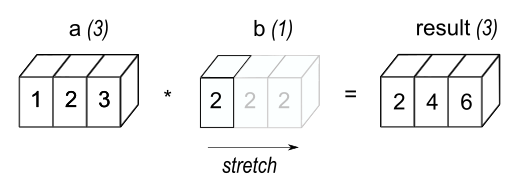

In [122]:
from IPython import display
display.Image("images/day3_broadcasting_1.png")

> Note: The 'stretching' is only conceptual. Numpy does not actually create these intermediate arrays, saving memory.

In [133]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1,2,3])

In [135]:
c = a + b
print(c)

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


The array `b` has been "broadcast" (extended) from a shape of (3,) to the shape of (4,3), so that it matches `a`. Then the two are summed element-wise.

> To broadcast, when operating on two arrays, NumPy compares their *shapes*, element-wise.
>
> It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
> * they are equal, or
> * one of them is 1


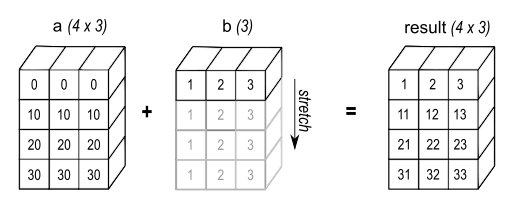

In [124]:
from IPython import display
display.Image("images/day3_broadcasting_2.png")

> A one dimensional array added to a two dimensional array results in broadcasting if number of 1-d array elements matches the number of 2-d array elements along the last dimension.

### Exercise

Re-define `a` to have a shape of `(3,4)` instead of `(4,3)`, and try the same operation `c = a+b`. What happens?

In [ ]:
# your solution here


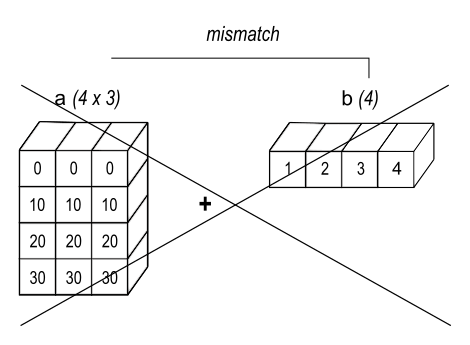

In [136]:
from IPython import display
display.Image("images/day3_broadcasting_3.png")

> When the trailing dimensions of the arrays are unequal, broadcasting fails because it is impossible to align the values in the "rows" (first dimension) of the 1st array with the elements of the 2nd arrays for element-by-element addition.

### Exercise

Create an array `x` with integers `0, 2, 4, ..., 10`, then compute a new array `dx` values where `dx[i] = x[i+1] - x[i]`. Do this without loops! Hint: Make `dx.size == x.size - 1`.

In [ ]:
# your solution here


## Built-in mathematical functions

We saw above the use of `np.sin(x)` to compute the sin of all the elements of a numpy array `x`. These functions operate elementwise on an array, producing an array of the same shape as output.

In [139]:
B = np.arange(5)
print(B)

[0 1 2 3 4]


In [140]:
np.cos(B)

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362])

In [141]:
np.exp(B)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [142]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ])

In [294]:
np.std(B)

0.9414688716912718

In [158]:
B = np.linspace(0,3,12)
print(B)

[0.         0.27272727 0.54545455 0.81818182 1.09090909 1.36363636
 1.63636364 1.90909091 2.18181818 2.45454545 2.72727273 3.        ]


In [159]:
np.floor(B)

array([0., 0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 3.])

In [160]:
np.ceil(B)

array([0., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [161]:
np.round(B)

array([0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3.])

In [162]:
np.isfinite(B)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Consult the [mathematical functions documentation](https://numpy.org/devdocs/reference/routines.math.html) for a complete list.

Many of these can be called "reductions", as they do not return a new array of the same size, but instead reduce it to e.g. a single number.

In [163]:
np.sum(B)

17.999999999999996

In [165]:
np.mean(B)

1.4999999999999998

Many of these functions can be applied as methods to an ndarray. There is no functional difference:

In [166]:
B.sum()

17.999999999999996

In [167]:
np.cumsum(B)

array([ 0.        ,  0.27272727,  0.81818182,  1.63636364,  2.72727273,
        4.09090909,  5.72727273,  7.63636364,  9.81818182, 12.27272727,
       15.        , 18.        ])

In [168]:
np.diff(B)

array([0.27272727, 0.27272727, 0.27272727, 0.27272727, 0.27272727,
       0.27272727, 0.27272727, 0.27272727, 0.27272727, 0.27272727,
       0.27272727])

In [169]:
np.clip(B,0,1)

array([0.        , 0.27272727, 0.54545455, 0.81818182, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [170]:
np.max(B)

3.0

In the case of multi-dimensional arrays, you can perform a reduction along a specified axis.

In [180]:
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
a.shape

(4, 3)

In [172]:
np.sum(a)

180.0

In [173]:
np.sum(a, axis=0)

array([60., 60., 60.])

In [174]:
np.sum(a, axis=1)

array([ 0., 30., 60., 90.])

### Exercise

Compute the maximum of `a` along each axis. At what index, along each axis, does the maximum occur? (Hint: use [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html#numpy.argmax)).

In [184]:
# your solution here


### Exercise

Create a new one-dimensional array with the following values: `[1.0, 4.2, np.nan, 7.9]`. The third value, "not a number", could represent e.g. missing or corrupted data. Compute the sum: what happens?

In [190]:
# your solution here


Most numpy functions have "nan-aware" equivalents, e.g. `nansum()` instead of `sum()`, which ignore (skip) all NaN values on purpose.

> Use when appropriate. Use only when needed, not everywhere. Seeing a NaN in your output can help you trace back to where such "bad values" started entering your computation.

## Random numbers

Random number generation is an important part of many algorithms and data analyses. In modern numpy, the way to do this is to first create a "generator":

In [288]:
rng = np.random.default_rng()

We can then sample from different random distributions, requesting $N=10$ numbers in each case:

In [289]:
rng.standard_normal(10) # Gaussian (mean = 0, stddev = 1)

array([-1.59269096,  0.38564734, -0.50561311, -1.23827575,  0.28769915,
       -0.47144991, -0.18210327,  0.68716981,  1.49845842, -0.22829834])

In [298]:
rng.normal(loc=0.0, scale=2.0, size=10) # Gaussian (mean=0, stddev = 2)

array([-3.25863297, -0.03965384,  0.28261281,  3.96584397,  3.67154679,
       -0.29205586, -0.93525315, -0.29685354,  3.13815663, -1.80318833])

In [292]:
rng.random(10) # uniformly distributed floats in the half-open interval [0.0, 1.0)

array([0.92721792, 0.94867469, 0.81135069, 0.66961763, 0.93205976,
       0.20036854, 0.80985279, 0.57573371, 0.03507943, 0.59663488])

In [300]:
rng.integers(low=5, high=50, size=10) # random integers from low (inclusive) to high (exclusive)

array([45, 30, 26, 35, 25, 36,  7, 20, 18, 19])

In [302]:
x = np.array([3,5,1,2,4])
rng.shuffle(x) # randomly permute
print(x)

[2 4 3 5 1]


> Note: in addition to uniform and normal (Gaussian) distributions, there are many others you can draw from: Beta, binomial, Dirichlet, exponential, F, gamma, logistic, lognormal, poisson, power, rayleigh, ...

It is often useful to control -which- random numbers are made: you may want random numbers, but the same random numbers every time you run your script. Otherwise, debugging a program with randomness can be a nightmare.

This is solved by setting the **random seed** when initializing the generator. The seed is just a number, any number.

In [304]:
rng = np.random.default_rng(424242)
rng.random(5)

array([0.47459685, 0.10508762, 0.28821333, 0.24054894, 0.71206926])

## Combining numpy arrays

Several arrays can be stacked together along different axes:

In [175]:
a = np.array([[9, 7],
              [5, 2]])
b = np.array([[1, 9],
              [5, 1]])

In [177]:
c = np.hstack((a,b))
print(c)
print(c.shape)

[[9 7 1 9]
 [5 2 5 1]]
(2, 4)


In [178]:
c = np.vstack((a,b))
print(c)
print(c.shape)

[[9 7]
 [5 2]
 [1 9]
 [5 1]]
(4, 2)


You can also use [np.concatenate()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate) for more complex cases.

> Note: in general, **avoid** combining numpy arrays together, or changing the size of existing numpy arrays, if at all possible! In practice, you are always creating an entirely new array, and then filling it with some existing values (slow). There is probably a better way to do what you're trying.

## Copies vs views

When operating and manipulating arrays, their **data is sometimes copied (into a new array), and sometimes not (only a 'view' is made)**. This is often a source of confusion, and can make big problems.

In [259]:
x = np.array([9,8,7,6,5,1,1,1])
y = x # no copy, y is just a 

Here, `y` is exactly the same as `x` - these are literally two "views" into the same data in memory (two names for the same ndarray). **Changing a view changes the original array as well!**

In [260]:
y[2] = 0
print(x)

[9 8 0 6 5 1 1 1]


In [261]:
y is x

True

Simple assignments make no copy of objects or their data. Also, because all arguments to functions in python are passed [by reference](https://stackoverflow.com/questions/373419/whats-the-difference-between-passing-by-reference-vs-passing-by-value), no copy of numpy arrays are made when you pass them into a function:

In [262]:
def f(my_array):
    print(my_array[0]) # my_array is a view as well...
    my_array[0] = -1
    
f(x)
print(x)

9
[-1  8  0  6  5  1  1  1]


While a view points to the same data, it can interpret it differently:

In [272]:
z = x.reshape((4,2))
print(z.shape)

(4, 2)


In [270]:
x.shape # unchanged

(8,)

Important: **slicing an array returns a view** of it:

In [278]:
z = x[2:5]

In [279]:
print(z)

[0 6 5]


In [283]:
z[:] = 10

In [281]:
print(z)

[10 10 10]


In [282]:
print(x)

[-1  8 10 10 10  1  1  1]


### Exercise

Create the same view as above `zz = x[2:5]`, but then assign `zz = 20`. What happens to `zz`, and what happens to `x`? Why?

In [284]:
# your solution here


If you explicitly want to avoid a view, and make sure that you create an independent copy of the data, so that it can be modified without changing the original array, you can **make a deep copy**:

In [286]:
arr = x[2:5].copy()
arr[:] = 30
print(arr)
print(x)

[30 30 30]
[-1  8 10 10 10  1  1  1]


In [287]:
arr2 = x.copy()
arr2[2] = 33
print(arr2)
print(x)

[-1  8 33 10 10  1  1  1]
[-1  8 10 10 10  1  1  1]


## Sorting

A common task, which is the basis for many algorithms, is sorting (re-ordering an array such that elements are in order from smallest to largest, or vice versa).

In [47]:
x = np.array([9,8,7,6,5,1,1,1,2])
y = np.sort(x)
print(y)

[1 1 1 2 5 6 7 8 9]


The second way to sort is not to return the actual sorted elements, but instead to return the -indices- which, when used to index the original array, return it in sorted order.

In [45]:
sort_inds = np.argsort(x)
print(sort_inds)

[5 6 7 8 4 3 2 1 0]


In [46]:
x[sort_inds]

array([1, 1, 1, 2, 5, 6, 7, 8, 9])

> This is useful if you have two (or more) arrays, and you want to sort them all, based on the elements of one (i.e. re-arrange them all in the same way).

### Exercise

The [data/day3_munich_temps_bad_data.txt](data/day3_munich_temps_bad_data.txt) text file is the same as before, with the temperature (C) in Munich every day for several years, but it now contains some bad data points, e.g. caused by malfunctions of the measurements, or problems in the data collection.

First, read in the file using [np.loadtxt()](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) -- get used to reading the numpy documentation.

Then, identify bad values by looking at the minimum and maximum values of the array. Use numpy masking/where selection to get rid of the bad temperature values. What fraction of data points remain? What is the true min and max across the data?

In [249]:
# your solution here


# [2] Matplotlib

There are several plotting libraries you can use in Python: there is no single "way to plot" in Python. Modern options include:

* [matplotlib](https://matplotlib.org/) - most general
* [plotly](https://plotly.com/python/) - emphasis on interactive plots
* [bokeh](https://bokeh.org/) - also an emphasis on interactive plots
* [seaborn](https://seaborn.pydata.org/) - emphasis on stats

That said, **matplotlib** is by far the most widely used, and we will show examples of how to use it here.

As with numpy, it is convention to import the library as:

In [248]:
import matplotlib.pyplot as plt

> Note: In the past, you had to enter `%matplotlib inline` in a cell of a Jupyter notebook to get plots to appear. This is no longer needed.

## A basic figure

A matplotlib figure looks like this:

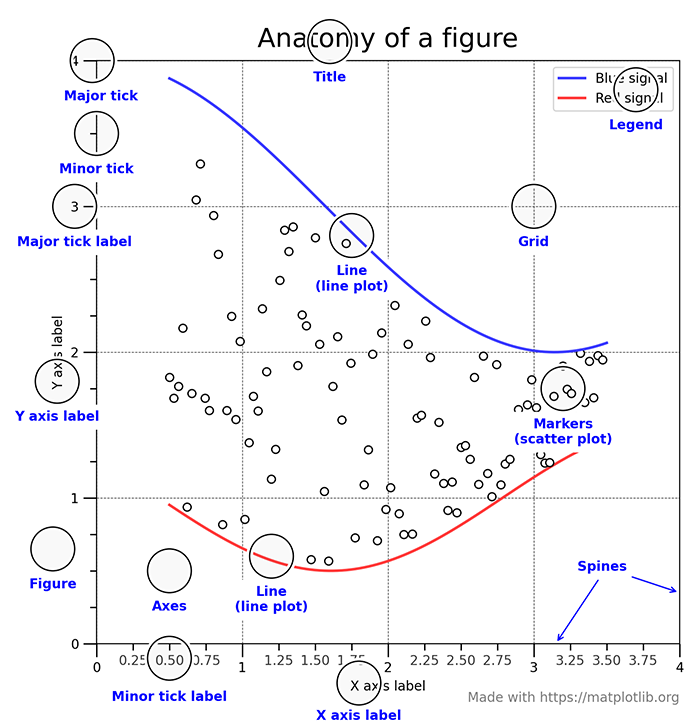

In [307]:
from IPython import display
display.Image("images/day3_matplotlib.png")

Constructing a basic figure:

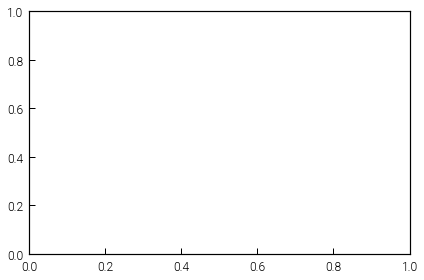

In [309]:
fig, ax = plt.subplots() # a single axis

Let's make some random data:

In [310]:
rng = np.random.default_rng(424242)
x = rng.random(50)
y = rng.random(50) * 2

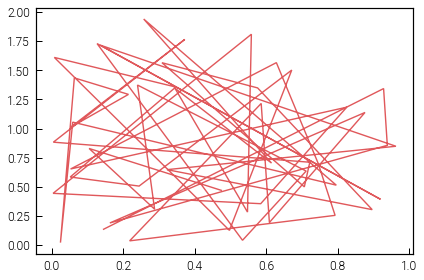

In [315]:
fig, ax = plt.subplots()
ax.plot(x,y) # in the Jupyter notebook, we can add a ';' after the last plotting command to suppress the object name/memory address from being printed

The most basic command, [plot(x,y)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), plots $x$ versus $y$ as either connected lines, or individual markers.

### Exercise

Use the documentation of `plot()` to figure out how to change from lines to individual markers. Plot the same data with green circles (`o`), and then blue squares (`s`).

In [318]:
# your solution here


In [ ]:
# TODO

## 2D numpy arrays as images

To visualize two-dimensional data, or plot a two dimensional function, we can "plot" the 2D numpy array as an image. Careful with the indexing conventions!

Let's generate a set of `x` coordinates (from `-1` to `+1`) and `y` coordinates (from `0.0` to `5.0`), then use [np.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to expand these "coordinate vectors" into two 2D arrays `xx` and `yy` containing the positions, along the x and y directions separately, for every element (i.e. "location" in x,y space).

In [210]:
x = np.linspace(-1,1,40)
y = np.linspace(0,5,20)

xx, yy = np.meshgrid(x,y)

In [205]:
xx.shape, yy.shape

((20, 40), (20, 40))

Then, imagine we want to compute the function $f(x,y) = \cos(8x) * \exp(y/2)$.

In [239]:
ff = np.cos(xx*8) * np.exp(yy/2)

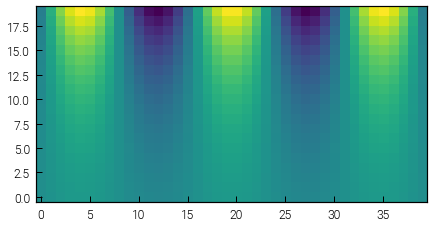

In [245]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ff)

There are two cosmetic issues with this figure:

1. No axis labels.
2. No colorbar, i.e. indication of what the color represents.

And there are two major scientific problems with it:

3. The axis extents are counting the number of "pixels", instead of representing the actual values of the $x$ and $y$ coordinates. The shape of the image also reflects the number of pixels (array shape). Fix with `extent`.
4. Our function $f(x,y)$ is sinusoidal in the x-direction, which is good, but decays in the y-direction as we go upwards from the bottom: not good!
   Mathematically, our function should increase in the positive y-direction. The current visualization, then, is flipped with respect to a normal coordinate system in a mathematical figure. Fix with `origin`.

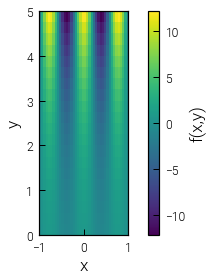

In [247]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(ff, origin='lower', extent=[x.min(),x.max(),y.min(),y.max()])

cb = fig.colorbar(im)

ax.set_xlabel('x')
ax.set_ylabel('y')
cb.set_label('f(x,y)')

> Note! On my personal computer (not the KIP Lab), the `origin` fix was not actually necessary. The default behavior of different matplotlib versions can change. Better be safe than sorry, always specify options when in doubt!

The key is to match the output of `np.meshgrid()` to the input of `imshow()`:

* With the default meshgrid ordering, you should use `origin='upper'` for imshow.
* You can instead specify the argument `indexing='ij'` to meshgrid, and then use `origin='lower'` with imshow.

Regardless, always carefully **check the consistency** between such a 2D visualization and the intended orientation/indexing of the underlying 2D array.

<hr style="border:2px solid #bbb; margin: 30px 0"> </hr>

# Day 3 Practice Problem - ...

# Solution:

In [ ]:
# your solution here


<hr style="border:2px solid #bbb; margin: 30px 0"> </hr>

# Day 3 Challenge Problem - Mandelbrot Fractal

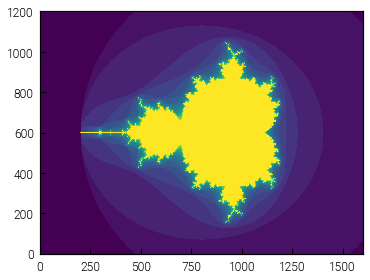

In [305]:
def mandelbrot(h, w, maxit=20, r=2):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    x = np.linspace(-2.5, 1.5, 4*h+1)
    y = np.linspace(-1.5, 1.5, 3*w+1)
    A, B = np.meshgrid(x, y)
    C = A + B*1j
    z = np.zeros_like(C)
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + C
        diverge = abs(z) > r                    # who is diverging
        div_now = diverge & (divtime == maxit)  # who is diverging now
        divtime[div_now] = i                    # note when
        z[diverge] = r                          # avoid diverging too much

    return divtime

plt.imshow(mandelbrot(400, 400))

In [ ]:
# https://realpython.com/mandelbrot-set-python/
